# Homework 2
---
- Build and train a MLP Model to classify Mnist dataset

    1. MLP Network accepts 1D data. So we should flatten our 2D image, then print the dimension of the result arrays.

    2. Normalize data by rescaling them to (0,1)

    3. Convert label arrays to 1-hot representation (keras.utils.to_categorical)

    4. Define Model

        - Hidden Layer 1: Fully Conncted + Relu Activition (e.g. 512 Nuerons)
        - Hidden Layer 2: Fully Connected + Relu Activition (e.g. 512 Neurons)
        - Output Layer: Fully Connected + Softmax Activition
- Build and train a CNN+MLP deep learning model with Keras with followings specs for MNIST dataset
    1. Conv2D(32, kernel_size=(3, 3), activation='relu')
    2. Conv2D(64, kernel_size=(3, 3), activation='relu')
    3. MaxPooling2D(pool_size=(2, 2))
    4. Flatten()
    5. Dense(128, activation='relu')
    6. Dense(num_classes, activation='softmax')

- Also build another model with BatchNormalization and Dropout. Compare these two CNN + MLP models performance for test data

# Importing the Packages 
---

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for plotting the digit image
%matplotlib inline  
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD
from keras.initializers import RandomNormal

# Loading the Data and Splitting into Test and Train 
---

In [64]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Check the random image and its label

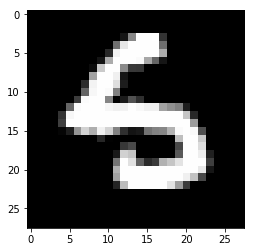

label: 5


In [3]:
rand_num = np.random.randint(60000)

plt.imshow(X_train[rand_num], cmap="gray")
plt.show()

# print its label
print('label:', y_train[rand_num])

### The Network accept 1D data. So we need to flatten our 2D image, then print the dimension of the result arrays.

In [4]:
X_train.shape

(60000, 28, 28)

### Reshaping

In [5]:
# reshape the data 
# NOTE: when data is big it is better to do reshaping and normalinzing inplace, bc copying the opject takes up a lot
# of memory space
X_train_reshaped = np.reshape(X_train, [-1, 28*28])
X_test_reshaped = np.reshape(X_test, [-1, 28*28])

In [6]:
X_test_reshaped.shape

(10000, 784)

### Normalize data by rescaling them to (0,1)

In [7]:
X_train_normal = X_train_reshaped / np.max(X_train_reshaped)
X_test_normal = X_test_reshaped / np.max(X_test_reshaped)

### Convert label arrays to 1-hot representation

In [56]:
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

## Define the Model
---

### Add the following layers to the network:

- Hidden Layer 1: Fully Conncted + Relu Activition (e.g. 512 Nuerons)
- Hidden Layer 2: Fully Connected + Relu Activition (e.g. 512 Neurons)
- Outout Layer: Fully Connected + Softmax Activition

In [11]:
# initialize the model
model = Sequential()
# Add the layers to model here.
model.add(Dense(512, activation='relu', input_shape=(784,), kernel_initializer=RandomNormal(0,0.01)))
model.add(Dense(512, activation='relu', kernel_initializer=RandomNormal(0,0.01)))
# Output Layer: Fully Connected + Softmax Activition
model.add(Dense(10, activation='softmax', kernel_initializer=RandomNormal(0,0.01)))

### Determine loss function, optimizer and metrics for the model

In [12]:
sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics = ['accuracy'])

### Print the review of the model

In [13]:
model.summary()
# Here we saved the raw model without any training. we will use it later.
model.save('raw_model.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [66]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

X_train = X_train / 255.0
X_test = X_test / 255.0

y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

In [53]:
model_complex.layers

In [67]:
# 1. Conv2D(32, kernel_size=(3, 3), activation='relu')
# 2. Conv2D(64, kernel_size=(3, 3), activation='relu')
# 3. MaxPooling2D(pool_size=(2, 2))
# 4. Flatten()
# 5. Dense(128, activation='relu')
# 6. Dense(num_classes, activation='softmax')

NUM_CLASSES = 10

model_complex = Sequential()
model_complex.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model_complex.add(Conv2D(32, kernel_size=3, activation='relu'))
model_complex.add(MaxPooling2D(pool_size=(2, 2)))
model_complex.add(Flatten())
model_complex.add(Dense(128, activation='relu'))
model_complex.add(Dense(NUM_CLASSES, activation='softmax'))

In [68]:
model_complex.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [70]:
model_complex.fit(X_train, y_train_one_hot, validation_data=(X_test, y_test_one_hot), epochs=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 184s 3ms/step - loss: 0.1145 - acc: 0.9651 - val_loss: 0.0444 - val_acc: 0.9854


In [62]:
X_train.shape

(60000, 28, 28, 1)